In [133]:
# import sys
# !{sys.executable} -m pip install set_openai_key

ERROR: Could not find a version that satisfies the requirement set_openai_key (from versions: none)
ERROR: No matching distribution found for set_openai_key


In [33]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/daraladjevardian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/daraladjevardian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
import tweepy
consumer_key = "XXXX"
consumer_secret = "XXXX"
access_token = "XXXX"
access_token_secret = "XXXX"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [81]:
username = 'daraladje'
count = 100
try:     
 # Creation of query method using parameters
 tweets = tweepy.Cursor(api.user_timeline,id=username).items(count)
 
 # Pulling information from tweets iterable object
 tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
 
 # Creation of dataframe from tweets list
 # Add or remove columns as you remove tweet information
 tweets_df = pd.DataFrame(tweets_list)
except BaseException as e:
      print('failed on_status,',str(e))
      time.sleep(3)

In [180]:

#This splits all the sentences up which makes it easier for us to work with

all_sentences = []

for word in tweets_df[2]:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

In [39]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [40]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))

In [42]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)


In [43]:

df = pd.DataFrame(stem2)

df = df[0].value_counts()

#df
#df['freq'] = df.groupby(0)[0].transform('count')
#df['freq'] = df.groupby(0)[0].transform('count')
#df.sort_values(by = ('freq'), ascending=False)

In [45]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 5357, 2: 943, 3: 441, 4: 258, 5: 192, 6: 141, 7: 119, 8: 90, 9: 83, 10: 62, ...})

In [52]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# #This is a simple plot that shows the top 20 words being used
# #df.plot(20)

# df = df[:20,]
# plt.figure(figsize=(10,5))
# sns.barplot(df.values, df.index, alpha=0.8)
# plt.title('Top Words Overall')
# plt.ylabel('Word from Tweet', fontsize=12)
# plt.xlabel('Count of Words', fontsize=12)
# plt.show()

In [55]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [56]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [57]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


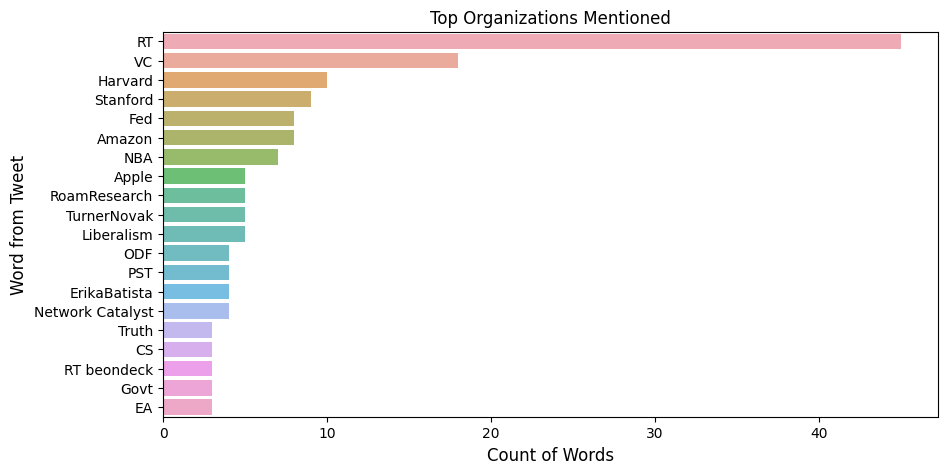

In [59]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [60]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


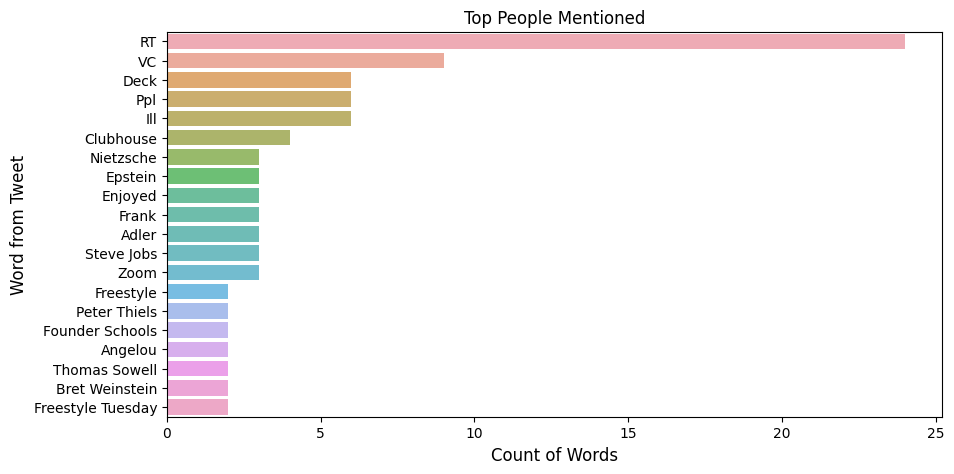

In [61]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [64]:
import openai

In [63]:
def gpt3(stext):
    openai.api_key = 'XXXX'
    response = openai.Completion.create(
        engine="davinci-instruct-beta",
        prompt=stext,
            temperature=0.1,
            max_tokens=10,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0
    )
    content = response.choices[0].text.split('.')
    print(content)
    return response.choices[0].text

In [99]:
document_list = tweets_df[2].values.tolist()
response = openai.Answer.create(
 search_model="ada",
 model="curie",
 question="What should I do before I quit my job?",
 documents=["Before quitting your job, you should have a problem space that you are interested in solving"],
 examples_context="In 2017, U.S. life expectancy was 78.6 years.",
 examples=[["What is human life expectancy in the United States?","78 years."]],
 max_tokens=100,
 stop=["\n", "<|endoftext|>"],
)

In [118]:
text = '''\
### Founder Reminder\

- Use your mental capacity and energy on your startup and idea

### Personal Reminders\
- Give and provide value to others

In [119]:
document_list = tweets_df[2].values.tolist()
response = openai.Answer.create(
 search_model="ada",
 model="curie",
 question="Give me a founder reminder.",
 documents=[text],
 examples_context=text,
 examples=[["Give me a social reminder.","Give and provide value to others."]],
 max_tokens=100,
 stop=["\n", "<|endoftext|>"],
)

In [125]:
import os
openai.api_key = 'XXXX'
completion = openai.Completion()

In [126]:
start_chat_log = '''Human: Hello, who are you?
AI: I am doing great. How can I help you today?
'''
def ask(question, chat_log=None):
    if chat_log is None:
        chat_log = start_chat_log
    prompt = f'{chat_log}Human: {question}\nAI:'
    response = completion.create(
        prompt=prompt, engine="davinci", stop=['\nHuman'], temperature=0.9,
        top_p=1, frequency_penalty=0, presence_penalty=0.6, best_of=1,
        max_tokens=150)
    answer = response.choices[0].text.strip()
    return answer

In [128]:
ask('Who is Barrack Obama?')

'He is the President of the United States.'

In [164]:
import openai
import uuid


def set_openai_key(key):
    """Sets OpenAI key."""
    openai.api_key = key


class Example:
    """Stores an input, output pair and formats it to prime the model."""
    def __init__(self, inp, out):
        self.input = inp
        self.output = out
        self.id = uuid.uuid4().hex

    def get_input(self):
        """Returns the input of the example."""
        return self.input

    def get_output(self):
        """Returns the intended output of the example."""
        return self.output

    def get_id(self):
        """Returns the unique ID of the example."""
        return self.id

    def as_dict(self):
        return {
            "input": self.get_input(),
            "output": self.get_output(),
            "id": self.get_id(),
        }


class GPT:
    """The main class for a user to interface with the OpenAI API.
    A user can add examples and set parameters of the API request.
    """
    def __init__(self,
                 engine='davinci',
                 temperature=0.5,
                 max_tokens=100,
                 input_prefix="input: ",
                 input_suffix="\n",
                 output_prefix="output: ",
                 output_suffix="\n\n",
                 append_output_prefix_to_query=False):
        self.documents=[]
        self.examples = {}
        self.engine = engine
        self.temperature = temperature
        self.max_tokens = max_tokens
        self.input_prefix = input_prefix
        self.input_suffix = input_suffix
        self.output_prefix = output_prefix
        self.output_suffix = output_suffix
        self.append_output_prefix_to_query = append_output_prefix_to_query
        self.stop = (output_suffix + input_prefix).strip()
        
    def add_document(self, ex):
        """Adds an example to the object.
        Example must be an instance of the Example class.
        """
        self.documents.append(ex)

    def add_example(self, ex):
        """Adds an example to the object.
        Example must be an instance of the Example class.
        """
        assert isinstance(ex, Example), "Please create an Example object."
        self.examples[ex.get_id()] = ex

    def delete_example(self, id):
        """Delete example with the specific id."""
        if id in self.examples:
            del self.examples[id]

    def get_example(self, id):
        """Get a single example."""
        return self.examples.get(id, None)

    def get_all_examples(self):
        """Returns all examples as a list of dicts."""
        return {k: v.as_dict() for k, v in self.examples.items()}

    def get_prime_text(self):
        """Formats all examples to prime the model."""
        return "".join(
            [self.format_example(ex) for ex in self.examples.values()])

    def get_engine(self):
        """Returns the engine specified for the API."""
        return self.engine

    def get_temperature(self):
        """Returns the temperature specified for the API."""
        return self.temperature

    def get_max_tokens(self):
        """Returns the max tokens specified for the API."""
        return self.max_tokens

    def craft_query(self, prompt):
        """Creates the query for the API request."""
        q = self.get_prime_text(
        ) + self.input_prefix + prompt + self.input_suffix
        if self.append_output_prefix_to_query:
            q = q + self.output_prefix

        return q
    
    def submit_search_request(self, prompt):
        """Calls the OpenAI API with the specified parameters."""
        response = openai.Answer.create(search_model="ada",
                                        model="curie",
                                        question=prompt,
                                        documents=self.documents,
                                        examples_context="In 2017, U.S. life expectancy was 78.6 years.",
                                        examples=[["What is human life expectancy in the United States?","78 years."]],
                                        max_tokens=self.get_max_tokens(),
                                        stop=["\n", "<|endoftext|>"])
        return response

    def submit_request(self, prompt):
        """Calls the OpenAI API with the specified parameters."""
        response = openai.Completion.create(engine=self.get_engine(),
                                            prompt=self.craft_query(prompt),
                                            max_tokens=self.get_max_tokens(),
                                            temperature=self.get_temperature(),
                                            top_p=1,
                                            n=1,
                                            stream=False,
                                            stop=self.stop)
        return response

    def get_top_reply(self, prompt):
        """Obtains the best result as returned by the API."""
        response = self.submit_request(prompt)
        return response['choices'][0]['text']

    def format_example(self, ex):
        """Formats the input, output pair."""
        return self.input_prefix + ex.get_input(
        ) + self.input_suffix + self.output_prefix + ex.get_output(
        ) + self.output_suffix

In [165]:
gpt = GPT(engine="davinci",
          temperature=0.5,
          max_tokens=100)

In [169]:

gpt.submit_search_request("What is Dara's last name?")

<OpenAIObject answer at 0x7fa3ad45f570> JSON: {
  "answers": [
    "Ladjevardian."
  ],
  "completion": "cmpl-3AspRd89TvYy0qFgHNK4sZXthtCuV",
  "model": "curie:2020-05-03",
  "object": "answer",
  "search_model": "ada",
  "selected_documents": [
    {
      "document": 0,
      "text": "Dara's last name is Ladjevardian "
    }
  ]
}

In [171]:
gpt.add_document(text)

In [174]:
openai.Answer.create(
  search_model="ada", 
  model="curie",
  question="which puppy is happy?", 
  documents=["Puppy A is happy.", "Puppy B is sad."],
  examples_context="In 2017, U.S. life expectancy was 78.6 years.", 
  examples=[["What is human life expectancy in the United States?","78 years."]],
  max_tokens=5,
  stop=["\n", "<|endoftext|>"],
)

<OpenAIObject answer at 0x7fa3ad4e3d00> JSON: {
  "answers": [
    "puppy A."
  ],
  "completion": "cmpl-3B63ZpmoC1Xxh1srcfpV8RnYmTXI0",
  "model": "curie:2020-05-03",
  "object": "answer",
  "search_model": "ada",
  "selected_documents": [
    {
      "document": 0,
      "text": "Puppy A is happy. "
    },
    {
      "document": 1,
      "text": "Puppy B is sad. "
    }
  ]
}